In [1]:
import numpy as np 
import pandas as pd 

import os
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [2]:
file_name = 'faces_data.csv'
column_names=['emotion','pixels','usage']
df=pd.read_csv(file_name,names=column_names, na_filter=False)
df

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
...,...,...,...
35883,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35884,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35885,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35886,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [3]:
def readlines(file_name):
    features = []
    target_variable = []
    first_column = True

    with open(file_name) as file_:
        for line in file_:
            if first_column:
                first_column = False
            else:
                row = line.split(',')
                target_variable.append(int(row[0]))
                features.append([int(p) for p in row[1].split()])
        features, target_variable = np.array(features) / 255.0, np.array(target_variable)
    return features, target_variable

In [4]:
features, target_variable = readlines(file_name)
num_class = len(set(target_variable))
print("In this dataset, we have ",num_class, "classes.")
#
#N, D = features.shape
features = features.reshape(features.shape[0], 48, 48, 1)
features.shape
#
print(features.shape)
print(features.size)
print(len(features))

In this dataset, we have  7 classes.
(35887, 48, 48, 1)
82683648
35887


In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, train_size=0.8, random_state=42, shuffle=False)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)
print("Train dataset shape",y_train.shape,"\n","Test dataset shape",y_test.shape)

Train dataset shape (28709, 7) 
 Test dataset shape (7178, 7)


In [6]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [7]:
path_model='model_output.h5' # save model at this location after each epoch
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=9, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/9
449/449 [==============================] - 818s 2s/step - loss: 1.9817 - accuracy: 0.2393 - val_loss: 1.9009 - val_accuracy: 0.2751
Epoch 2/9
449/449 [==============================] - 863s 2s/step - loss: 1.7952 - accuracy: 0.3047 - val_loss: 1.7099 - val_accuracy: 0.3388
Epoch 3/9
449/449 [==============================] - 854s 2s/step - loss: 1.6692 - accuracy: 0.3555 - val_loss: 1.6168 - val_accuracy: 0.3767
Epoch 4/9
449/449 [==============================] - 794s 2s/step - loss: 1.5785 - accuracy: 0.3925 - val_loss: 1.4922 - val_accuracy: 0.4160
Epoch 5/9
449/449 [==============================] - 884s 2s/step - loss: 1.5066 - accuracy: 0.4207 - val_loss: 1.5537 - val_accuracy: 0.4157
Epoch 6/9
449/449 [==============================] - 851s 2s/step - loss: 1.4422 - accuracy: 0.4458 - val_loss: 1.4291 - val_accuracy: 0.4599
Epoch 7/9
449/449 [==============================] - 779s 2s/step - loss: 1.3831 - accuracy: 0.4668 - val_loss: 1.3508 - val_accuracy: 0.4865
Epoch 

In [8]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(7178, 7)

In [9]:
def emotion_analysis(emotions):
    objects = ('is angry', 'is disgusted', 'is afraid', ' is happy', 'is sad', 'is surprised', 'is neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
plt.show()

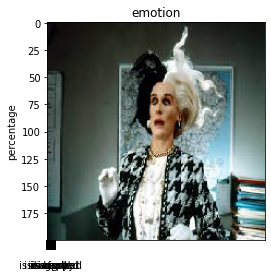

Expression Prediction: is afraid


In [21]:
from skimage import io
objects = ('is angry', 'is disgusted', 'is afraid', ' is happy', 'is sad', 'is surprised', 'is neutral')

img = image.load_img('images.jpeg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('images.jpeg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

In [23]:
from tensorflow.keras.models import save_model, load_model
save_model(model,'NN.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: NN.model/assets
